In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import pandas as pd

data = pd.read_csv(
    'https://raw.githubusercontent.com/Garve/datasets/4576d323bf2b66c906d5130d686245ad205505cf/mmm.csv',
    parse_dates=['Date'],
    index_col='Date'
)

X = data.drop(columns=['Sales'])
y = data['Sales']

lr = LinearRegression()

print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()))

# Output: [0.69594303 0.69302285 0.66850729 0.78807363 0.73512387]

[0.69594303 0.69302285 0.66850729 0.78807363 0.73512387]


In [2]:
lr.fit(X, y) # refit the model with the complete dataset

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

# Output:
# Coefficients: [0.35968382 0.48833246 1.2159193 ]
# Intercept: 6678.396933606161

Coefficients: [0.35968382 0.48833246 1.2159193 ]
Intercept: 6678.39693360616


In [3]:
print(lr.predict(([[11543.58, 4615.35, 2518.88]])))

# Output: [16147.01594158]

[16147.01594158]


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


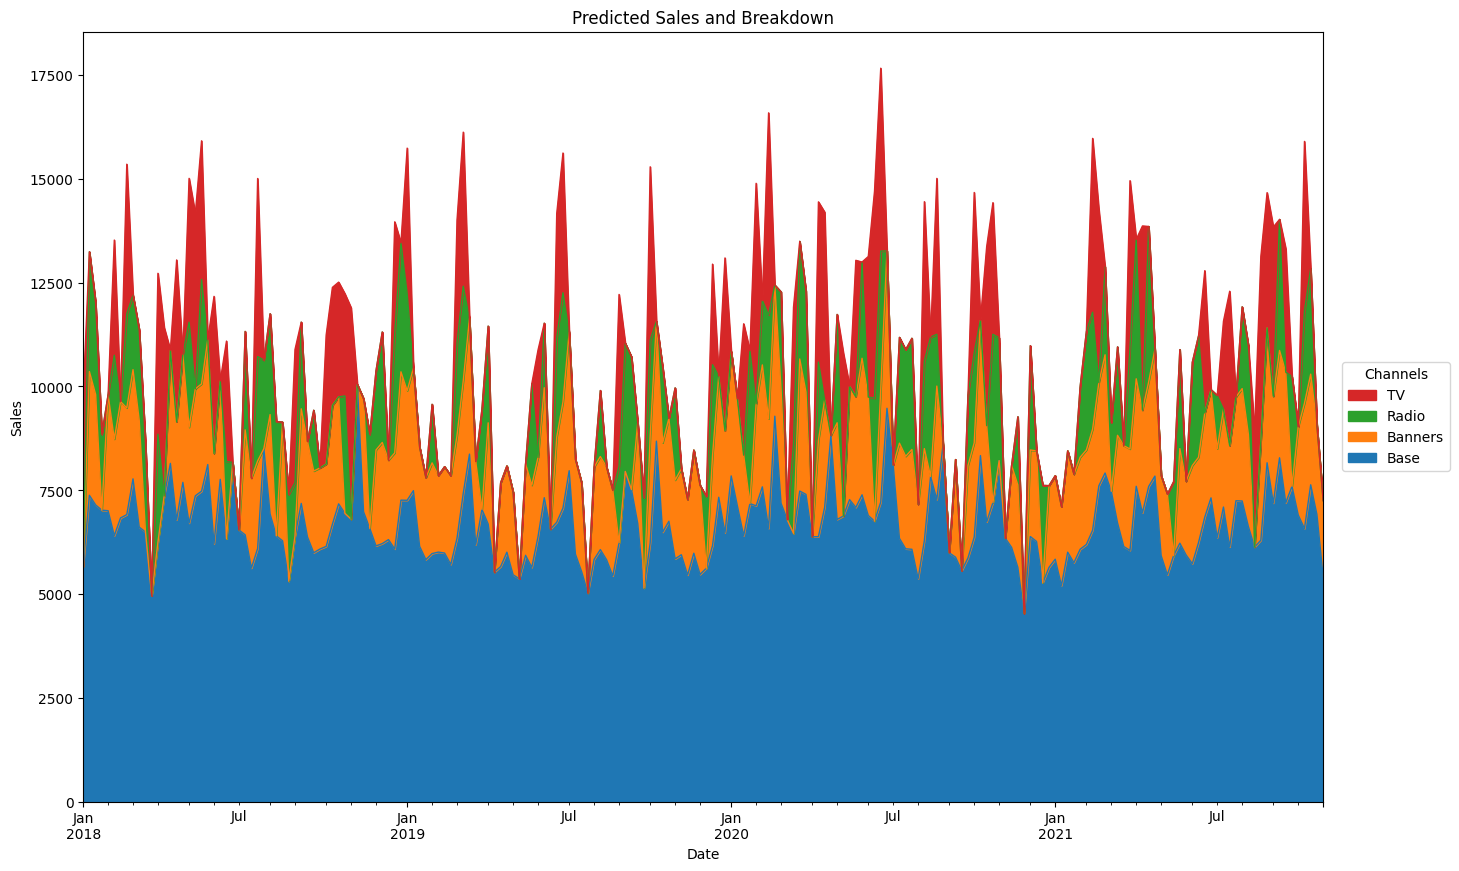

In [4]:
weights = pd.Series(
    lr.coef_,
    index=X.columns
)

base = lr.intercept_

unadj_contributions = X.mul(weights).assign(Base=base)

adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    ) # contains all contributions for each day

ax = (adj_contributions[['Base', 'Banners', 'Radio', 'TV']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date')
     )

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

In [5]:
sales_from_tv = adj_contributions['TV'].sum()
spendings_on_tv = data['TV'].sum()
tv_roi = sales_from_tv / spendings_on_tv
# tv_roi is around 0.36

In [6]:
tv_roi

0.360245007135532